In [64]:
import pandas 
data=pd.read_csv('/Users/bayinbulukemeiyouhai/Downloads/Nvidia.csv')

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [66]:
dataset=pd.read_csv('/Users/bayinbulukemeiyouhai/Downloads/Nvidia.csv')

In [67]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376820,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.416296,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383998,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382802,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381605,22752000


In [69]:
X=dataset.drop('Volume',axis=1)
y=dataset['Volume']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [74]:
X_train=X_train.drop(['Date'],axis=1)
X_test=X_test.drop(['Date'],axis=1)
X_train

,Open,High,Low,Close,Adj Close
4291,6.195000,6.390000,6.195000,6.325000,6.184034
4521,26.952499,27.297501,26.407499,26.617500,26.274452
411,3.135417,3.260417,3.005208,3.255208,2.990635
2897,2.350000,2.400000,2.267500,2.282500,2.096985
2916,2.402500,2.500000,2.390000,2.480000,2.278432
...,...,...,...,...,...
1653,2.496667,2.509167,2.440000,2.450833,2.251637
3283,3.935000,4.155000,3.915000,4.077500,3.746093
2667,3.597500,3.757500,3.592500,3.682500,3.383197
4184,5.687500,5.735000,5.545000,5.557500,5.413085


# Масштабирование признаков
## Методом Z-оценки:

In [75]:
def arr_df(a):
    df = pd.DataFrame(a, columns=X_train.columns)
    return df
scaler1 = StandardScaler()
scaled_X_1 = arr_df(scaler1.fit_transform(X_train))
scaled_X_1

,Open,High,Low,Close,Adj Close
0,-0.345023,-0.342954,-0.341799,-0.341499,-0.338609
1,0.213943,0.211804,0.211551,0.204559,0.201764
2,-0.427413,-0.425994,-0.429124,-0.424106,-0.424502
3,-0.448563,-0.448824,-0.449320,-0.450281,-0.448538
4,-0.447149,-0.446171,-0.445967,-0.444966,-0.443658
...,...,...,...,...,...
4278,-0.444613,-0.445927,-0.444598,-0.445751,-0.444379
4279,-0.405881,-0.402257,-0.404217,-0.401978,-0.404182
4280,-0.414969,-0.412804,-0.413046,-0.412607,-0.413943
4281,-0.358689,-0.360333,-0.359594,-0.362152,-0.359345


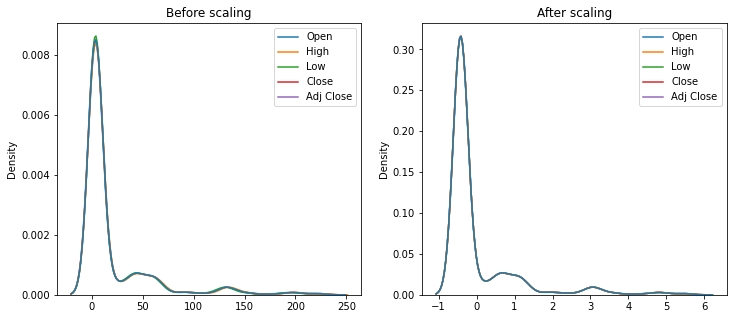

In [76]:
def data_visualize(columns, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.set_title(label1)
    sns.kdeplot(data=df1[columns], ax=ax1)
    ax2.set_title(label2)
    sns.kdeplot(data=df2[columns], ax=ax2)
    plt.show()

data_visualize(X_train.columns, X_train, scaled_X_1, 'Before scaling', 'After scaling')

In [77]:
scaler2 = MinMaxScaler()
scaled_X_2 = arr_df(scaler2.fit_transform(X_train))
scaled_X_2

,Open,High,Low,Close,Adj Close
0,0.025643,0.026288,0.026031,0.026235,0.025735
1,0.116692,0.117387,0.115913,0.115202,0.113806
2,0.012222,0.012652,0.011847,0.012776,0.011736
3,0.008777,0.008903,0.008566,0.008511,0.007819
4,0.009008,0.009339,0.009111,0.009377,0.008614
...,...,...,...,...,...
4278,0.009421,0.009378,0.009333,0.009249,0.008497
4279,0.015730,0.016550,0.015892,0.016381,0.015048
4280,0.014249,0.014818,0.014458,0.014649,0.013457
4281,0.023417,0.023434,0.023141,0.022870,0.022356


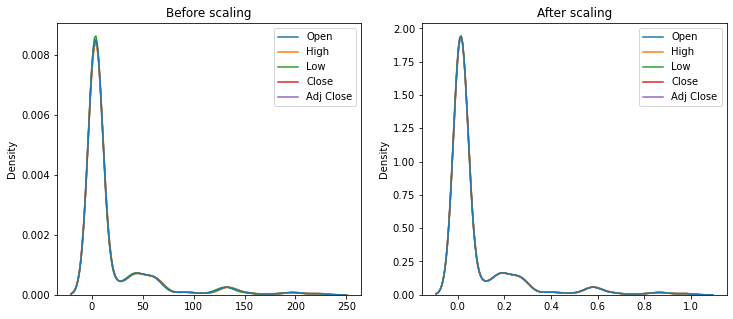

In [78]:
data_visualize(X_train.columns, X_train, scaled_X_2, 'Before scaling', 'After scaling')


## Методом RobustScaler:

In [79]:
scaler3 = RobustScaler()
scaled_X_3 = arr_df(scaler3.fit_transform(X_train))
scaled_X_3

,Open,High,Low,Close,Adj Close
0,0.376160,0.390481,0.390850,0.395873,0.443289
1,3.716539,3.689061,3.682544,3.661423,3.860742
2,-0.116200,-0.103274,-0.128621,-0.098130,-0.099920
3,-0.242593,-0.239022,-0.248760,-0.254662,-0.251933
4,-0.234144,-0.223245,-0.228810,-0.222880,-0.221069
...,...,...,...,...,...
4278,-0.218991,-0.221799,-0.220668,-0.227573,-0.225627
4279,0.012472,0.037865,0.019543,0.034196,0.028586
4280,-0.041840,-0.024849,-0.032978,-0.029369,-0.033144
4281,0.294491,0.287142,0.284995,0.272364,0.312147


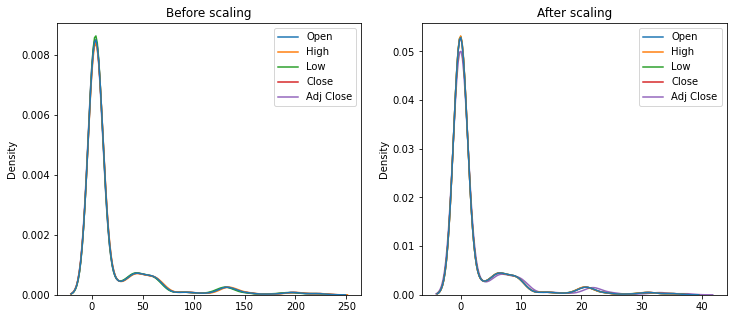

In [80]:
data_visualize(X_train.columns, X_train, scaled_X_3, 'Before scaling', 'After scaling')

# Обработка выбросов для числовых признаков
### Удаление выборсов

In [81]:
def plot_for_analys(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[variable])    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [82]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

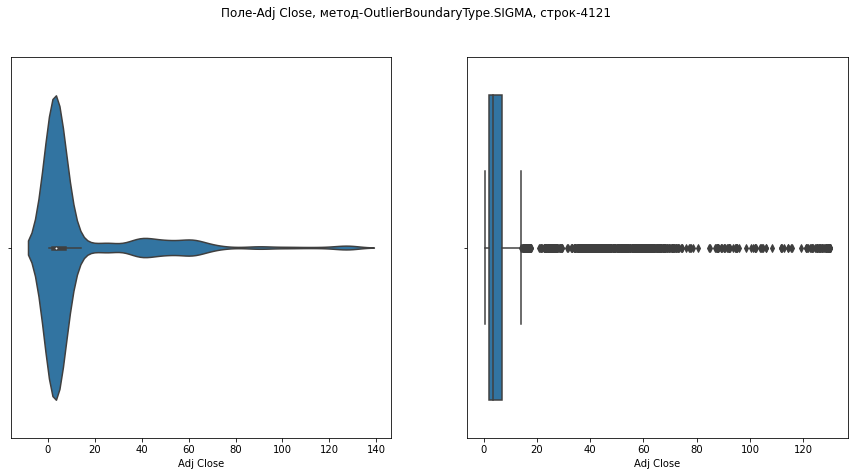

In [84]:
x_col_list = ['Adj Close']
data=X_train
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        plot_for_analys(data_trimmed, col, title)

### Замена выбросов

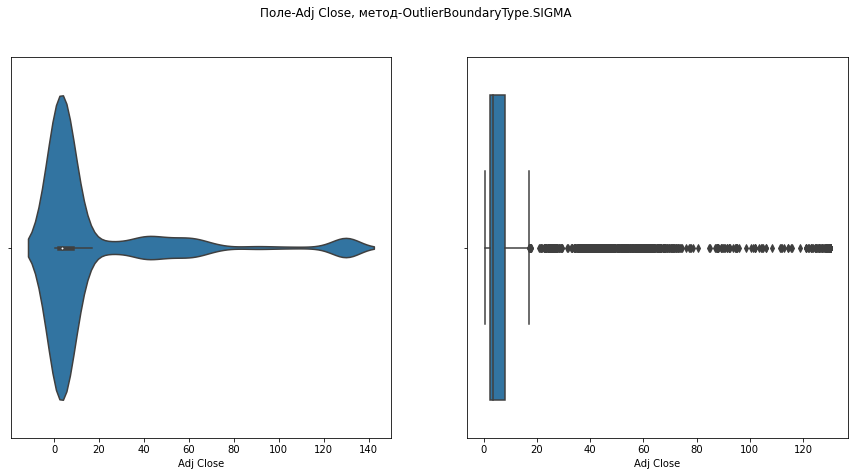

In [85]:
 for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        plot_for_analys(data, col, title)

## Обработка по крайней мере одного нестандартного признака

In [86]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376820,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.416296,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383998,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382802,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381605,22752000


In [87]:
dataset['Date'] = dataset.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [88]:
dataset['Date'] = dataset.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [89]:
# День
dataset['day'] = dataset['Date'].dt.day
# Месяц
dataset['month'] = dataset['Date'].dt.month
# Год
dataset['year'] = dataset['Date'].dt.year
#Неделя года
dataset['week'] = dataset['Date'].dt.isocalendar().week
#День недели 
dataset['dayofweek'] = dataset['Date'].dt.dayofweek
#Выходной день
dataset['day_name'] = dataset['Date'].dt.day_name()
dataset['is_holiday'] = dataset.apply(lambda x: 1 if x['Date'].dayofweek in [5,6] else 0, axis=1)


In [90]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,week,dayofweek,day_name,is_holiday
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376820,271468800,22,1,1999,3,4,Friday,0
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.416296,51048000,25,1,1999,4,0,Monday,0
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383998,34320000,26,1,1999,4,1,Tuesday,0
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382802,24436800,27,1,1999,4,2,Wednesday,0
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381605,22752000,28,1,1999,4,3,Thursday,0


In [91]:
dataset['now'] = datetime.datetime.today()
dataset['diff'] = dataset['now'] - dataset['Date']
dataset.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
day                     int64
month                   int64
year                    int64
week                   UInt32
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [92]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,week,dayofweek,day_name,is_holiday,now,diff
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376820,271468800,22,1,1999,3,4,Friday,0,2022-06-02 18:00:11.898588,8532 days 18:00:11.898588
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.416296,51048000,25,1,1999,4,0,Monday,0,2022-06-02 18:00:11.898588,8529 days 18:00:11.898588
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383998,34320000,26,1,1999,4,1,Tuesday,0,2022-06-02 18:00:11.898588,8528 days 18:00:11.898588
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382802,24436800,27,1,1999,4,2,Wednesday,0,2022-06-02 18:00:11.898588,8527 days 18:00:11.898588
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381605,22752000,28,1,1999,4,3,Thursday,0,2022-06-02 18:00:11.898588,8526 days 18:00:11.898588


## Отбор признаков из группы методов фильтрации (корреляция признаков)

<AxesSubplot:>

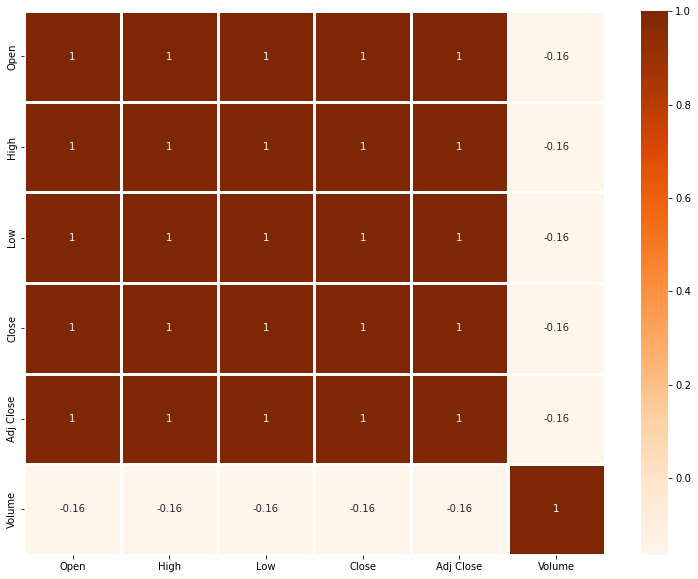

In [117]:
data_dir2 = "/Users/bayinbulukemeiyouhai/Downloads/Nvidia.csv"
data=pd.read_csv(data_dir2)
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

In [118]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.53]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [119]:
make_corr_df(data)

,f1,f2,corr
0,Close,Adj Close,0.999993
1,Adj Close,Close,0.999993
2,Low,Close,0.999877
3,Close,Low,0.999877
4,High,Open,0.999876
5,Open,High,0.999876
6,Low,Adj Close,0.999870
7,Adj Close,Low,0.999870
8,High,Close,0.999870
9,Close,High,0.999870


In [120]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [121]:
corr_groups(make_corr_df(data))

[['Adj Close', 'Low', 'High', 'Open', 'Close']]

In [124]:
data=data.drop(['Open','High'],axis=1)
data.head()

,Date,Low,Close,Adj Close,Volume
0,1999-01-22,0.388021,0.410156,0.376820,271468800
1,1999-01-25,0.410156,0.453125,0.416296,51048000
2,1999-01-26,0.411458,0.417969,0.383998,34320000
3,1999-01-27,0.395833,0.416667,0.382802,24436800
4,1999-01-28,0.412760,0.415365,0.381605,22752000


# Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [127]:
!pip install mlxtend

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
data=pd.read_csv(data_dir2)
X=data[['Open','High','Low','Close','Adj Close']]
y=data[['Volume']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=3)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 25/25

Best accuracy score: 0.00
Best subset (indices): (0, 1)
Best subset (corresponding names): ('Open', 'High')


# Отбор признаков из группы методов вложения (линейная регрессия)

In [130]:
from sklearn.linear_model import Lasso
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(X_train.columns, e_ls1.coef_))

[('Open', 376428.10910448094),
 ('High', 1795991.730224488),
 ('Low', -4049034.5344644077),
 ('Close', 2013937.0350618593),
 ('Adj Close', -426838.8414639504)]

In [131]:
from sklearn.feature_selection import SelectFromModel
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(X_train.columns, sel_e_ls1.get_support()))

[('Open', True),
 ('High', True),
 ('Low', True),
 ('Close', True),
 ('Adj Close', True)]